In [120]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
pd.options.mode.chained_assignment = None  # default='warn'


In [121]:
# Store filepath in a variable
data = "Resources/420.csv"


In [122]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
df = pd.read_csv(data)
df.head()


,Unnamed: 0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,burglary,larceny,motor_vehicle_theft,Legal Status,Medicinal,Decriminalized,Recreational,Year legalized (Rec),Medical,Year legalized (Med)
0,0,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,...,5616,15076,2501,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
1,1,1980,AK,Alaska,440142,1919,39,250.0,NaN,360,...,5545,14916,2469,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
2,2,1981,AK,Alaska,412000,2537,60,421.0,NaN,472,...,5479,16310,2845,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
3,3,1982,AK,Alaska,438000,2732,81,374.0,NaN,586,...,5204,16672,2603,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
4,4,1983,AK,Alaska,479000,2940,66,486.0,NaN,465,...,5720,17085,3084,Fully Legal,Yes,Yes,Yes,2014,Yes,1998


In [123]:
#Create dataframe showing legal status per each state
state_legalstatus = df[['state_abbr', 'Legal Status', 'Year legalized (Rec)', 'Year legalized (Med)']].drop_duplicates().reset_index().drop(columns='index')
state_legalstatus.head()

,state_abbr,Legal Status,Year legalized (Rec),Year legalized (Med)
0,AK,Fully Legal,2014,1998
1,AL,Mixed,0,2021
2,AR,Mixed,0,2016
3,AZ,Fully Legal,2020,2010
4,CA,Fully Legal,2016,1996


In [124]:
#Display legal status categories
state_legalstatus['Legal Status'].value_counts()

Mixed            24
Fully Legal      20
Fully Illegal     6
Mixed**           1
Name: Legal Status, dtype: int64

In [125]:
#Combine 'Mixed**' with 'Mixed' and remove 'Fully'
state_legalstatus.replace('Mixed**', 'Mixed', inplace=True)
state_legalstatus.replace("Fully Legal", "Legal", inplace=True)
state_legalstatus.replace("Fully Illegal", "Illegal", inplace=True)

state_legalstatus["Legal Status"].value_counts()

Mixed      25
Legal      20
Illegal     6
Name: Legal Status, dtype: int64

In [126]:
#Make a pie chart for legal status
# Labels for the sections of our pie chart
labels = state_legalstatus["Legal Status"].unique()

# The values of each section of the pie chart
sizes = state_legalstatus["Legal Status"].value_counts()

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]


Text(0.5, 1.0, 'Distribution of States by Legal Status')

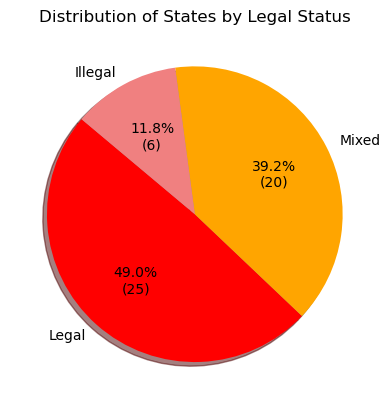

In [127]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.pie(sizes, labels=labels, colors=colors,
        autopct=lambda pct: func(pct, sizes), shadow=True, startangle=140)
plt.title("Distribution of States by Legal Status")

In [128]:
#list columns to find names to build new dataframe
df.columns

Index(['Unnamed: 0', 'year', 'state_abbr', 'state_name', 'population',
       'violent_crime', 'homicide', 'rape_legacy', 'rape_revised', 'robbery',
       'aggravated_assault', 'property_crime', 'burglary', 'larceny',
       'motor_vehicle_theft', 'Legal Status', 'Medicinal', 'Decriminalized',
       'Recreational', 'Year legalized (Rec)', 'Medical',
       'Year legalized (Med)'],
      dtype='object')

In [129]:
#create new dataframe for crimes and rates and add new columns for rate of crime per population
#create dataframe
crimes_df = df[['year', 'state_abbr', 'Legal Status', 'Year legalized (Rec)', 'population', 'violent_crime', 'homicide', 'rape_legacy', 'rape_revised', 'robbery',
       'aggravated_assault','property_crime', 'burglary', 'larceny','motor_vehicle_theft']]
crimes_df.replace('Mixed**', 'Mixed', inplace=True)

#variables to calculate rates
vc = crimes_df['violent_crime']
pop = crimes_df['population']
pc = crimes_df['property_crime']
hom = crimes_df['homicide']
rape_leg = crimes_df['rape_legacy']
rape_rev = crimes_df['rape_revised']
rob = crimes_df['robbery']
agg_ass = crimes_df['aggravated_assault']
burg = crimes_df['burglary']
larc = crimes_df['larceny']
mv_theft = crimes_df['motor_vehicle_theft']

#calculate rates
vc_rate = vc/pop
pc_rate = pc/pop
hom_rate = hom/pop
rape_leg_rate = rape_leg/pop
rape_rev_rate = rape_rev/pop
rob_rate = rob/pop
agg_ass_rate = agg_ass/pop
burg_rate = burg/pop
larc_rate = larc/pop
mv_theft_rate = mv_theft/pop

#add property and violent crime rates per 1000 population to dataframe
crimes_df["Violent Crime per 1000"] = vc_rate * 1000
crimes_df["Property Crime per 1000"] = pc_rate * 1000
crimes_df["Homicides per 1000"] = hom_rate * 1000
crimes_df["Legacy Rape per 1000"] = rape_leg_rate * 1000
crimes_df["Revised Rape per 1000"] = rape_rev_rate * 1000
crimes_df["Robbery per 1000"] = rob_rate * 1000
crimes_df["Aggravated Assault per 1000"] = agg_ass_rate * 1000
crimes_df["Burglary per 1000"] = burg_rate * 1000
crimes_df["Larceny per 1000"] = larc_rate * 1000
crimes_df["Motor Vehicle Theft per 1000"] = mv_theft_rate * 1000

In [130]:
crimes_df

,year,state_abbr,Legal Status,Year legalized (Rec),population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,Violent Crime per 1000,Property Crime per 1000,Homicides per 1000,Legacy Rape per 1000,Revised Rape per 1000,Robbery per 1000,Aggravated Assault per 1000,Burglary per 1000,Larceny per 1000,Motor Vehicle Theft per 1000
0,1979,AK,Fully Legal,2014,406000,1994,54,292.0,NaN,445,...,4.911330,57.125616,0.133005,0.719212,NaN,1.096059,2.963054,13.832512,37.133005,6.160099
1,1980,AK,Fully Legal,2014,440142,1919,39,250.0,NaN,360,...,4.359957,52.096823,0.088608,0.567999,NaN,0.817918,2.885432,12.598207,33.889063,5.609553
2,1981,AK,Fully Legal,2014,412000,2537,60,421.0,NaN,472,...,6.157767,59.791262,0.145631,1.021845,NaN,1.145631,3.844660,13.298544,39.587379,6.905340
3,1982,AK,Fully Legal,2014,438000,2732,81,374.0,NaN,586,...,6.237443,55.888128,0.184932,0.853881,NaN,1.337900,3.860731,11.881279,38.063927,5.942922
4,1983,AK,Fully Legal,2014,479000,2940,66,486.0,NaN,465,...,6.137787,54.048017,0.137787,1.014614,NaN,0.970772,4.014614,11.941545,35.668058,6.438413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2014,WY,Fully Illegal,0,584304,1142,16,127.0,174.0,53,...,1.954462,19.642173,0.027383,0.217353,0.297790,0.090706,1.538583,2.890619,15.719557,1.031997
2036,2015,WY,Fully Illegal,0,586555,1300,16,124.0,171.0,59,...,2.216331,19.011005,0.027278,0.211404,0.291533,0.100587,1.796933,3.003981,14.997741,1.009283
2037,2016,WY,Fully Illegal,0,584910,1431,20,152.0,206.0,59,...,2.446530,19.592758,0.034193,0.259869,0.352191,0.100870,1.959276,3.027816,15.197210,1.367732
2038,2017,WY,Fully Illegal,0,578934,1358,14,NaN,253.0,98,...,2.345691,18.185147,0.024182,NaN,0.437010,0.169277,1.715221,2.687698,14.182964,1.314485


In [131]:
#number of states legalized by year
year_counts = state_legalstatus["Year legalized (Rec)"].mask(state_legalstatus["Year legalized (Rec)"]==0).value_counts()
year_counts.sort_index()

2012.0    2
2014.0    2
2015.0    1
2016.0    4
2018.0    1
2019.0    1
2020.0    4
2021.0    4
2022.0    1
Name: Year legalized (Rec), dtype: int64

In [132]:
#dataframes of legal, illegal, and mixed states
legal_states_df = state_legalstatus.loc[state_legalstatus['Year legalized (Rec)']!=0]
illegal_states_df = state_legalstatus.loc[state_legalstatus['Legal Status']=='Illegal']
mixed_states_df = state_legalstatus.loc[state_legalstatus['Legal Status']=="Mixed"]



In [133]:
#set states as variables
legal_states = legal_states_df["state_abbr"]
illegal_states = legal_states_df["state_abbr"]
mixed_states = legal_states_df["state_abbr"]

In [134]:
#filter original df for each legal status
legal_states_df = crimes_df.loc[crimes_df["Legal Status"] == "Fully Legal", :]
illegal_states_df = crimes_df.loc[crimes_df["Legal Status"] == "Fully Illegal", :]
mixed_states_df = crimes_df.loc[crimes_df["Legal Status"] == "Mixed", :]


In [135]:
#create property crime data frames groupby year and state for each legal status
legal_state_prop = pd.DataFrame(legal_states_df.groupby(['year', 'state_abbr'])['Property Crime per 1000'].mean())
illegal_state_prop = pd.DataFrame(illegal_states_df.groupby(['year', 'state_abbr'])['Property Crime per 1000'].mean())
mixed_state_prop = pd.DataFrame(mixed_states_df.groupby(['year', 'state_abbr'])['Property Crime per 1000'].mean())


In [136]:
#create violent crime data frames groupby year and state for each legal status
legal_state_viol = pd.DataFrame(legal_states_df.groupby(['year', 'state_abbr'])['Violent Crime per 1000'].mean())
illegal_state_viol = pd.DataFrame(illegal_states_df.groupby(['year', 'state_abbr'])['Violent Crime per 1000'].mean())
mixed_state_viol = pd.DataFrame(mixed_states_df.groupby(['year', 'state_abbr'])['Violent Crime per 1000'].mean())


Text(0, 0.5, 'Crime Rate (per 1,000)')

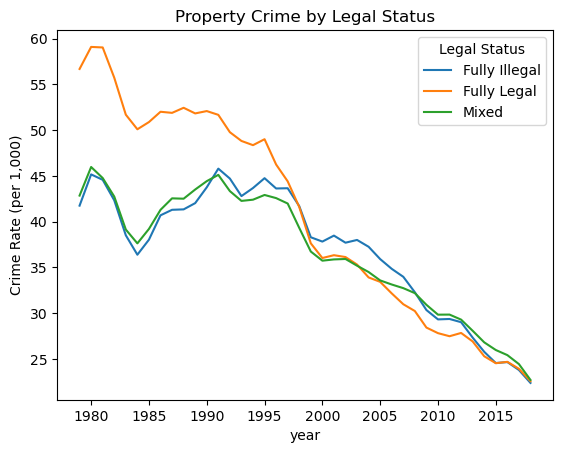

In [137]:
#Line graphs of aggregate means for Property Crime by Legal Status
prop_status = pd.DataFrame(crimes_df.groupby(['Legal Status', 'year'])['Property Crime per 1000'].mean())

pd.pivot_table(prop_status.reset_index(),
               index='year', columns='Legal Status', values='Property Crime per 1000').plot(subplots=False)
plt.title('Property Crime by Legal Status')
plt.ylabel('Crime Rate (per 1,000)')

Text(0, 0.5, 'Crime Rate (per 1,000)')

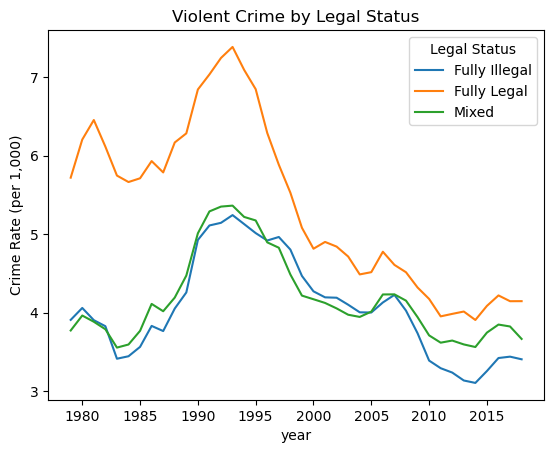

In [138]:
#Line graphs of aggregate means for Violent Crime by Legal Status
viol_status = pd.DataFrame(crimes_df.groupby(['Legal Status', 'year'])['Violent Crime per 1000'].mean())

pd.pivot_table(viol_status.reset_index(),
               index='year', columns='Legal Status', values='Violent Crime per 1000').plot(subplots=False)
plt.title('Violent Crime by Legal Status')
plt.ylabel('Crime Rate (per 1,000)')

In [139]:
#isolate lines and drop legal status index
prop_mean_legal = prop_status.loc[['Fully Legal']].droplevel('Legal Status')
prop_mean_illegal = prop_status.loc[['Fully Illegal']].droplevel('Legal Status')
viol_mean_legal = viol_status.loc[['Fully Legal']].droplevel('Legal Status')
viol_mean_illegal = viol_status.loc[['Fully Illegal']].droplevel('Legal Status')

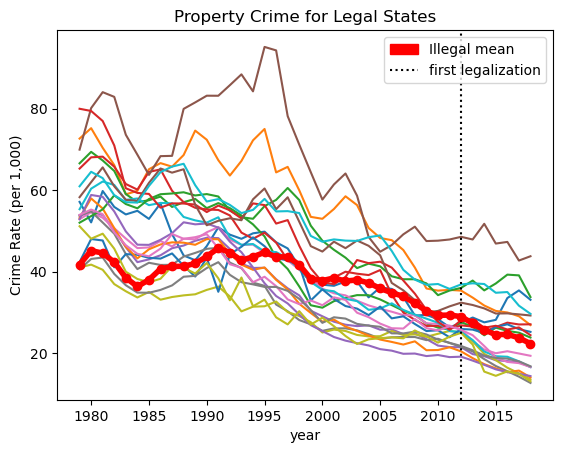

In [140]:
#Line graph of Property Crime for legal states vs Illegal mean
pd.pivot_table(legal_state_prop.reset_index(),
               index='year', columns='state_abbr', values='Property Crime per 1000').plot()
plt.title('Property Crime for Legal States')
plt.ylabel('Crime Rate (per 1,000)')
first_legal = plt.axvline(x = 2012, color = 'black', label='first legalization', linestyle=':')
Illegal, = plt.plot(prop_mean_illegal, linewidth=4, color='red', marker='o')
red_patch = mpatches.Patch(color='red', label='Illegal mean')
plt.legend(handles=[red_patch, first_legal], loc='upper right')
plt.show()

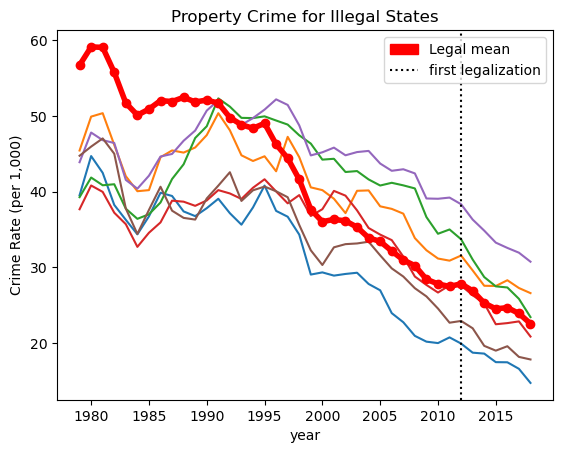

In [141]:
#Line graph of Property Crime for illegal states vs Legal mean
pd.pivot_table(illegal_state_prop.reset_index(),
               index='year', columns='state_abbr', values='Property Crime per 1000').plot(subplots=False, legend=None)
plt.title('Property Crime for Illegal States')
plt.ylabel('Crime Rate (per 1,000)')
first_legal = plt.axvline(x = 2012, color = 'black', label='first legalization', linestyle=':')
Legal, = plt.plot(prop_mean_legal, linewidth=4, color='red', marker='o')
red_patch = mpatches.Patch(color='red', label='Legal mean')
plt.legend(handles=[red_patch, first_legal], loc='upper right')
plt.show()

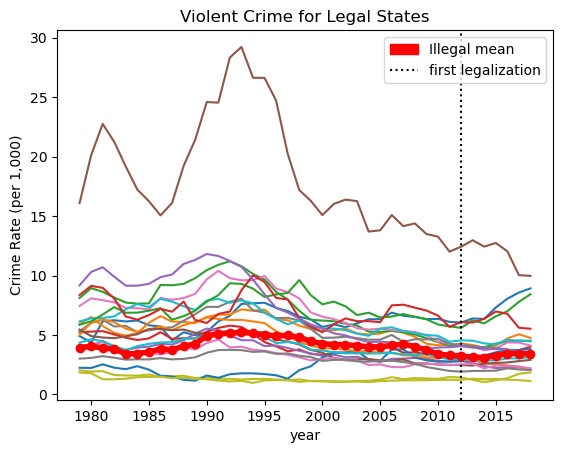

In [142]:
#Line graph of Violent Crime for legal states vs Illegal mean
pd.pivot_table(legal_state_viol.reset_index(),
               index='year', columns='state_abbr', values='Violent Crime per 1000').plot(subplots=False, legend=None)
plt.title('Violent Crime for Legal States')
plt.ylabel('Crime Rate (per 1,000)')
first_legal = plt.axvline(x = 2012, color = 'black', label='first legalization', linestyle=':')
Illegal, = plt.plot(viol_mean_illegal, linewidth=4, color='red', marker='o')
red_patch = mpatches.Patch(color='red', label='Illegal mean')
plt.legend(handles=[red_patch, first_legal])
plt.show()

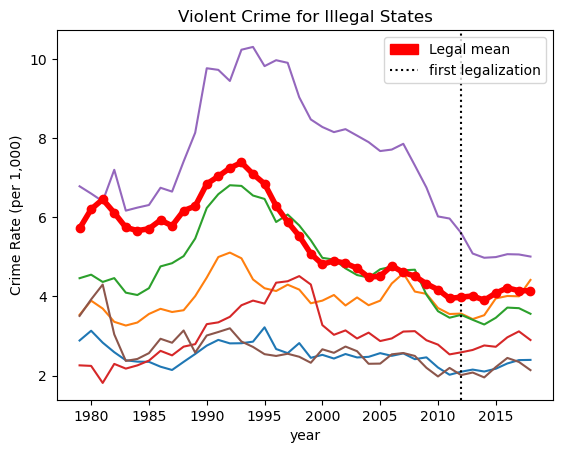

In [143]:
#Line graph of Violent Crime for illegal states vs Legal mean
pd.pivot_table(illegal_state_viol.reset_index(),
               index='year', columns='state_abbr', values='Violent Crime per 1000').plot(subplots=False, legend=None)
plt.title('Violent Crime for Illegal States')
plt.ylabel('Crime Rate (per 1,000)')
first_legal = plt.axvline(x = 2012, color = 'black', label='first legalization', linestyle=':')
Legal, = plt.plot(viol_mean_legal, linewidth=4, color='red', marker='o')
red_patch = mpatches.Patch(color='red', label='Legal mean')
plt.legend(handles=[red_patch, first_legal])
plt.show()

In [144]:
crimes_df

,year,state_abbr,Legal Status,Year legalized (Rec),population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,Violent Crime per 1000,Property Crime per 1000,Homicides per 1000,Legacy Rape per 1000,Revised Rape per 1000,Robbery per 1000,Aggravated Assault per 1000,Burglary per 1000,Larceny per 1000,Motor Vehicle Theft per 1000
0,1979,AK,Fully Legal,2014,406000,1994,54,292.0,NaN,445,...,4.911330,57.125616,0.133005,0.719212,NaN,1.096059,2.963054,13.832512,37.133005,6.160099
1,1980,AK,Fully Legal,2014,440142,1919,39,250.0,NaN,360,...,4.359957,52.096823,0.088608,0.567999,NaN,0.817918,2.885432,12.598207,33.889063,5.609553
2,1981,AK,Fully Legal,2014,412000,2537,60,421.0,NaN,472,...,6.157767,59.791262,0.145631,1.021845,NaN,1.145631,3.844660,13.298544,39.587379,6.905340
3,1982,AK,Fully Legal,2014,438000,2732,81,374.0,NaN,586,...,6.237443,55.888128,0.184932,0.853881,NaN,1.337900,3.860731,11.881279,38.063927,5.942922
4,1983,AK,Fully Legal,2014,479000,2940,66,486.0,NaN,465,...,6.137787,54.048017,0.137787,1.014614,NaN,0.970772,4.014614,11.941545,35.668058,6.438413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2014,WY,Fully Illegal,0,584304,1142,16,127.0,174.0,53,...,1.954462,19.642173,0.027383,0.217353,0.297790,0.090706,1.538583,2.890619,15.719557,1.031997
2036,2015,WY,Fully Illegal,0,586555,1300,16,124.0,171.0,59,...,2.216331,19.011005,0.027278,0.211404,0.291533,0.100587,1.796933,3.003981,14.997741,1.009283
2037,2016,WY,Fully Illegal,0,584910,1431,20,152.0,206.0,59,...,2.446530,19.592758,0.034193,0.259869,0.352191,0.100870,1.959276,3.027816,15.197210,1.367732
2038,2017,WY,Fully Illegal,0,578934,1358,14,NaN,253.0,98,...,2.345691,18.185147,0.024182,NaN,0.437010,0.169277,1.715221,2.687698,14.182964,1.314485


In [145]:
crimes_df.columns

Index(['year', 'state_abbr', 'Legal Status', 'Year legalized (Rec)',
       'population', 'violent_crime', 'homicide', 'rape_legacy',
       'rape_revised', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'Violent Crime per 1000',
       'Property Crime per 1000', 'Homicides per 1000', 'Legacy Rape per 1000',
       'Revised Rape per 1000', 'Robbery per 1000',
       'Aggravated Assault per 1000', 'Burglary per 1000', 'Larceny per 1000',
       'Motor Vehicle Theft per 1000'],
      dtype='object')

In [146]:
#create data frames groupby year and state for each legal status for individual violent crimes
legal_state_vcrimes = pd.DataFrame(legal_states_df.groupby('year')[['Homicides per 1000','Robbery per 1000','Aggravated Assault per 1000']].mean())
illegal_state_vcrimes = pd.DataFrame(illegal_states_df.groupby('year')[['Homicides per 1000','Robbery per 1000','Aggravated Assault per 1000']].mean())
mixed_state_vcrimes = pd.DataFrame(mixed_states_df.groupby('year')[['Homicides per 1000','Robbery per 1000','Aggravated Assault per 1000']].mean())
legal_state_pcrimes = pd.DataFrame(legal_states_df.groupby('year')[['Burglary per 1000', 'Larceny per 1000', 'Motor Vehicle Theft per 1000']].mean())
illegal_state_pcrimes = pd.DataFrame(illegal_states_df.groupby('year')[['Burglary per 1000', 'Larceny per 1000', 'Motor Vehicle Theft per 1000']].mean())

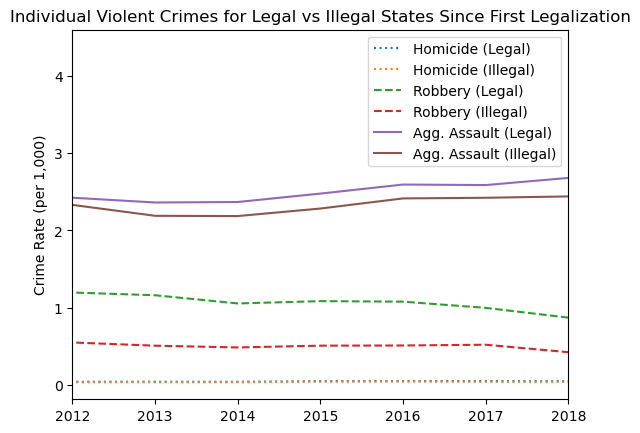

In [147]:
#Line graph of Violent Crimes for legal vs illegal states
plt.plot(legal_state_vcrimes['Homicides per 1000'], label='Homicide (Legal)', linestyle=':')
plt.plot(illegal_state_vcrimes['Homicides per 1000'], label= 'Homicide (Illegal)', linestyle=":")
plt.plot(legal_state_vcrimes['Robbery per 1000'], label='Robbery (Legal)', linestyle='--')
plt.plot(illegal_state_vcrimes['Robbery per 1000'], label= 'Robbery (Illegal)', linestyle="--")
plt.plot(legal_state_vcrimes['Aggravated Assault per 1000'], label='Agg. Assault (Legal)')
plt.plot(illegal_state_vcrimes['Aggravated Assault per 1000'], label= 'Agg. Assault (Illegal)')
plt.title('Individual Violent Crimes for Legal vs Illegal States Since First Legalization')
plt.ylabel('Crime Rate (per 1,000)')
plt.xlim(2012,2018)
plt.legend()
plt.show()

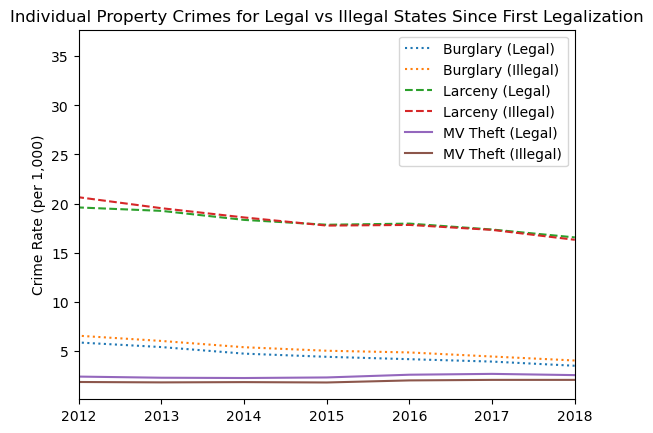

In [148]:
#Line graph of Property Crimes for legal states
plt.plot(legal_state_pcrimes['Burglary per 1000'], label='Burglary (Legal)', linestyle=':')
plt.plot(illegal_state_pcrimes['Burglary per 1000'], label= 'Burglary (Illegal)', linestyle=":")
plt.plot(legal_state_pcrimes['Larceny per 1000'], label='Larceny (Legal)', linestyle='--')
plt.plot(illegal_state_pcrimes['Larceny per 1000'], label= 'Larceny (Illegal)', linestyle="--")
plt.plot(legal_state_pcrimes['Motor Vehicle Theft per 1000'], label='MV Theft (Legal)')
plt.plot(illegal_state_pcrimes['Motor Vehicle Theft per 1000'], label= 'MV Theft (Illegal)')
plt.title('Individual Property Crimes for Legal vs Illegal States Since First Legalization')
plt.ylabel('Crime Rate (per 1,000)')
plt.xlim(2012,2018)
plt.legend()
plt.show()